# K-Means Clustering for Combined Datasets

This notebook applies k-means clustering to combined datasets from the directory. It loads all `X_train.csv` and `X_test.csv` files, concatenates them, and applies k-means clustering to analyze patterns across the entire dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import os


In [2]:

# Paths to main dataset directory
dataset_dir = './Competition_data'

# Initialize empty DataFrames for aggregated data
X_train_all = pd.DataFrame()
y_train_all = pd.DataFrame()

# Loop through each dataset folder and load training data
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)
    if os.path.isdir(folder_path):
        X_train_path = os.path.join(folder_path, 'X_train.csv')
        y_train_path = os.path.join(folder_path, 'y_train.csv')
        
        # Concatenate each dataset's training data
        X_train_all = pd.concat([X_train_all, pd.read_csv(X_train_path)], ignore_index=True)
        y_train_all = pd.concat([y_train_all, pd.read_csv(y_train_path)], ignore_index=True)

# Check for missing values and handle them
X_train_all.fillna(0, inplace=True)

# Display the combined data
X_train_all.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_88,Feature_89,Feature_90,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Feature_97
0,-0.659247,-0.083739,-0.566116,-0.084240,-0.089862,-0.462229,-0.089846,-0.217566,-0.079304,-0.164407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.196560,0.184938,0.347867,0.229415,0.803588,0.618597,0.775470,0.677312,-0.079304,-0.164407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.383980,0.631936,1.084821,0.632012,1.167168,1.153074,1.167167,1.110771,-0.079304,-0.164407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.962083,-0.270897,-0.566116,-0.271678,0.406406,0.618597,0.440842,0.169777,-0.079304,-0.164407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.083654,0.986852,1.084821,0.986879,1.351969,1.153074,1.351969,1.299255,1.499914,1.502625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:

# Applying K-Means Clustering
num_clusters = 2  # Example number of clusters

kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Predict the clusters
X_train_all['Cluster'] = kmeans.fit_predict(X_train_all)

# Display clustering result
X_train_all['Cluster'].value_counts()


Cluster
1    14188
0      547
Name: count, dtype: int64

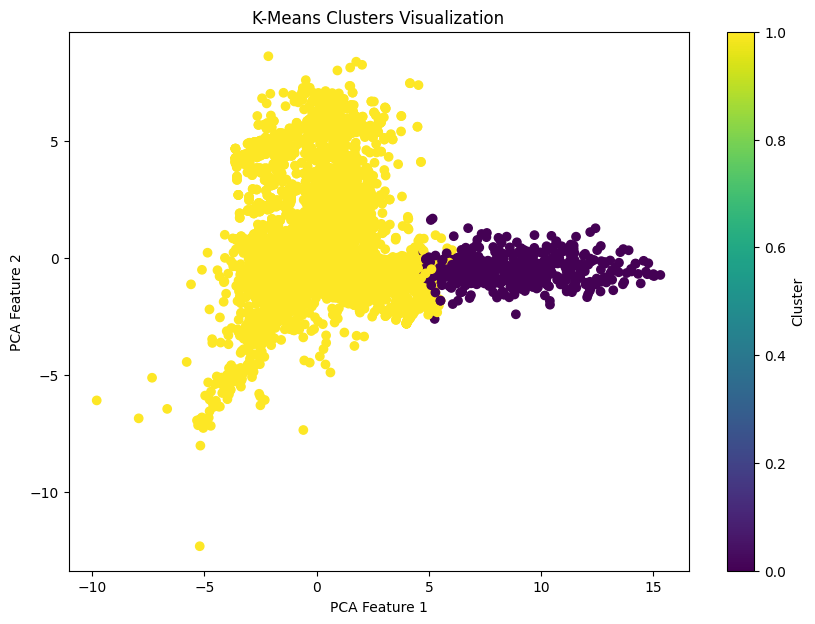

In [7]:

# Visualize clusters with PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Reduce features to two dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X_train_all.drop(columns=['Cluster']))

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=X_train_all['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('K-Means Clusters Visualization')
plt.show()


In [8]:


# Initialize dictionary to store predictions for each dataset
predictions = {}

# Loop through each dataset folder, load data, fit k-means, and save predictions
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)
    if os.path.isdir(folder_path):
        # Define paths
        X_train_path = os.path.join(folder_path, 'X_train.csv')
        X_test_path = os.path.join(folder_path, 'X_test.csv')
        
        # Load train and test data
        X_train = pd.read_csv(X_train_path)
        X_test = pd.read_csv(X_test_path)
        
        # Fill any missing values with zero
        X_train.fillna(0, inplace=True)
        X_test.fillna(0, inplace=True)
        
        # Fit k-means on training data and predict clusters for both train and test sets
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
        kmeans.fit(X_train)
        
        # Predict clusters for test data
        test_clusters = kmeans.predict(X_test)
        
        # Save predictions in the dictionary
        predictions[folder_name] = test_clusters
        
        # Save predictions to a CSV file for submission
        submission_path = os.path.join(folder_path, 'submission.csv')
        pd.DataFrame(test_clusters, columns=['Cluster']).to_csv(submission_path, index=False)
        print(f"Saved submission for {folder_name} to {submission_path}")

# Display a sample prediction
predictions[next(iter(predictions))]


Saved submission for Dataset_2 to ./Competition_data/Dataset_2/submission.csv
Saved submission for Dataset_35 to ./Competition_data/Dataset_35/submission.csv
Saved submission for Dataset_5 to ./Competition_data/Dataset_5/submission.csv
Saved submission for Dataset_32 to ./Competition_data/Dataset_32/submission.csv
Saved submission for Dataset_4 to ./Competition_data/Dataset_4/submission.csv
Saved submission for Dataset_33 to ./Competition_data/Dataset_33/submission.csv
Saved submission for Dataset_3 to ./Competition_data/Dataset_3/submission.csv
Saved submission for Dataset_34 to ./Competition_data/Dataset_34/submission.csv
Saved submission for Dataset_45 to ./Competition_data/Dataset_45/submission.csv
Saved submission for Dataset_42 to ./Competition_data/Dataset_42/submission.csv
Saved submission for Dataset_27 to ./Competition_data/Dataset_27/submission.csv
Saved submission for Dataset_18 to ./Competition_data/Dataset_18/submission.csv
Saved submission for Dataset_20 to ./Competition

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,